### 0619 머신러닝

In [1]:
import pandas as pd
 # 데이터 예시
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [25, 30, None, 35, 28],
    'Gender': ['Male', 'Female', 'Female', 'Male', None],
    'Satisfaction': [5, 4, 3, None, 2],
    'PurchaseAmount': [100, 200, None, 150, 0]
}
df = pd.DataFrame(data)

In [2]:
df

,CustomerID,Age,Gender,Satisfaction,PurchaseAmount
0,1,25.0,Male,5.0,100.0
1,2,30.0,Female,4.0,200.0
2,3,NaN,Female,3.0,NaN
3,4,35.0,Male,NaN,150.0
4,5,28.0,None,2.0,0.0


In [3]:
# 결측치 처리
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['PurchaseAmount'].fillna(0, inplace=True)

C:\Users\ez\AppData\Local\Temp\ipykernel_21356\1417400035.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\ez\AppData\Local\Temp\ipykernel_21356\1417400035.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [6]:
# Gender는 숫자로 변환 (Label Encoding)
df['Gender'] =df['Gender'].map({'Male': 0, 'Female': 1})

# 특성과 타겟 분리
X =df[['Age', 'Gender', 'PurchaseAmount']] # 입력 데이터
Y =df['Satisfaction'] # 출력 데이터

print(X)
print(Y)

    Age  Gender  PurchaseAmount
0  25.0     NaN           100.0
1  30.0     NaN           200.0
2  29.5     NaN             0.0
3  35.0     NaN           150.0
4  28.0     NaN             0.0
0    5.0
1    4.0
2    3.0
3    NaN
4    2.0
Name: Satisfaction, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42
)

In [10]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)


    Age  Gender  PurchaseAmount
4  28.0     NaN             0.0
2  29.5     NaN             0.0
0  25.0     NaN           100.0
3  35.0     NaN           150.0
    Age  Gender  PurchaseAmount
1  30.0     NaN           200.0
4    2.0
2    3.0
0    5.0
3    NaN
Name: Satisfaction, dtype: float64
1    4.0
Name: Satisfaction, dtype: float64


### Regression (선형회귀를 이용한 예측
)

In [11]:
# 회귀 (Regression)
# 입력 데이터를 기반으로 숫자 값을 예측하는 문제를 해결하는 방법

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# 1. 데이터 준비

# 학습데이터(공부시간) : 2차원 배열로 바꿔야 한다.
X = np.array([1,2,3,4,5]).reshape(-1, 1) 

# 라벨 : 결과 - 시험점수
y = np.array([50,55,65,70,75])


In [13]:
# 2. 모델 학습 : 모델 객체 생성
model = LinearRegression() # 선형회귀 모델 생성

# 훈련 fit()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# 3. 학습 결과 지표 : 기울기, 절편
m = model.coef_[0] #기울기
b = model.intercept_ # 절편

print('학습된 기울기 : ', m)
print('학습된 절편 : ', b)


학습된 기울기 :  6.500000000000001
학습된 절편 :  43.5


In [17]:
# 4. 학습된 모델로 값 예측 : predict()
y_pred = model.predict(X)

In [22]:
# 5. 성능
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
print('mse: ',mse)
print('rmse: ',rmse)
print('mae: ', mae)
r2 = r2_score(y, y_pred)
print('r2: ', r2)



mse:  1.5
rmse:  1.224744871391589
mae:  1.0
r2:  0.9825581395348837


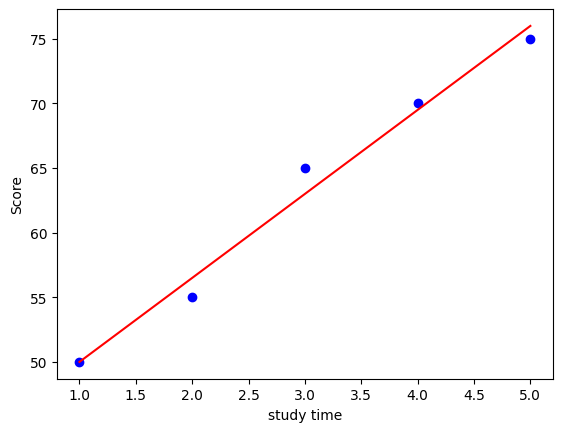

In [23]:
plt.scatter(X, y , color='blue', label = 'Original Data')
plt.plot(X, y_pred, color='red', label='Prediced Data')
plt.xlabel('study time')
plt.ylabel('Score')
plt.title('')
plt.show()

In [24]:
# 6시간 => 예측
new_hour = np.array([3,6]).reshape(-1,1)
pridict_score = model.predict(new_hour)
print(pridict_score)

[63.  82.5]
